# Exploritory Data Analysis

## Importing Training Data

---


In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('./train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

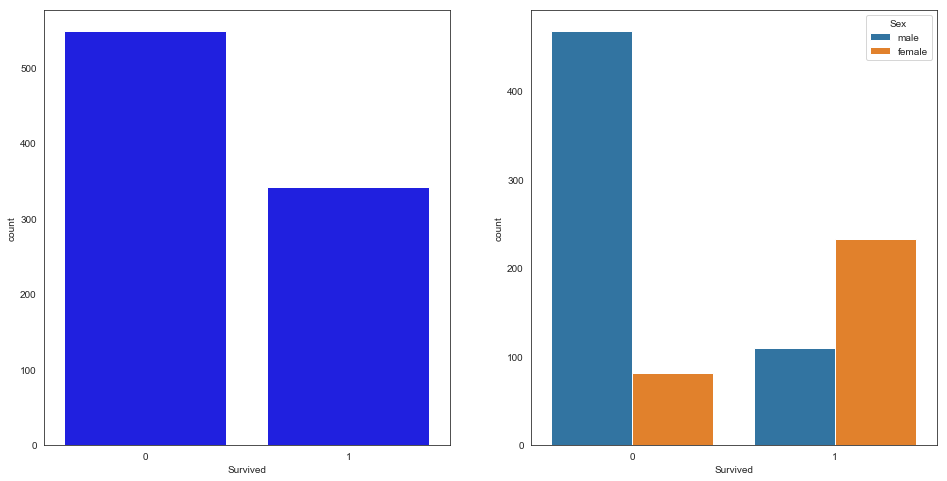

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('white')
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot('Survived', data=train, color='b', ax=ax[0])
sns.countplot('Survived',data=train, hue='Sex', ax=ax[1]);


#train.hist(alpha=0.5, bins=30, figsize=(15, 15), grid=False);

Unfortunetly most people died, however your were more likely to survive as a women. 

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


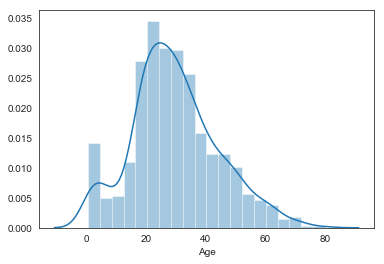

In [15]:
sns.distplot(train['Age'].dropna());

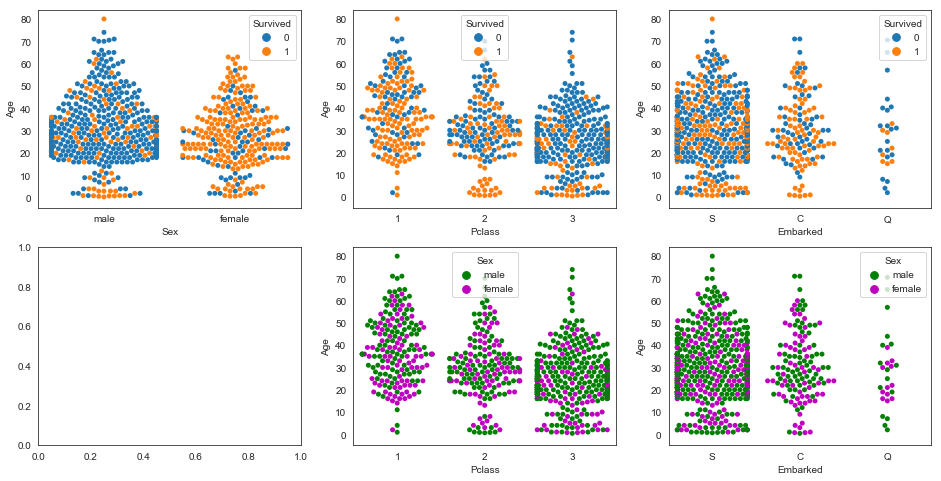

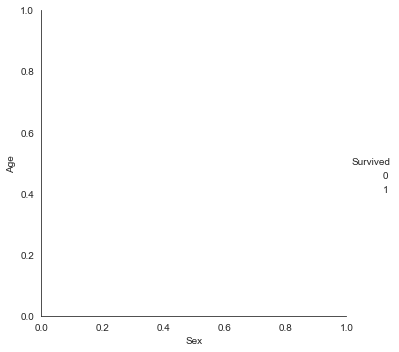

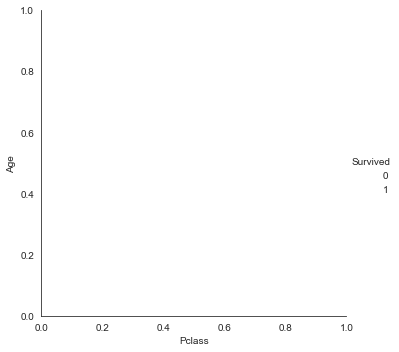

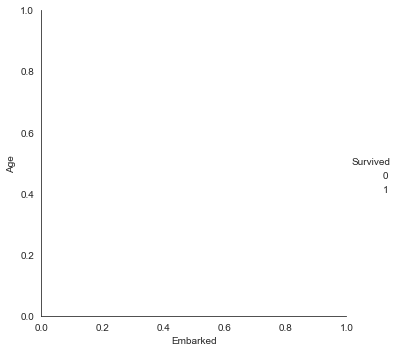

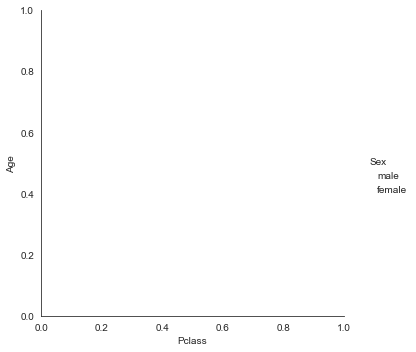

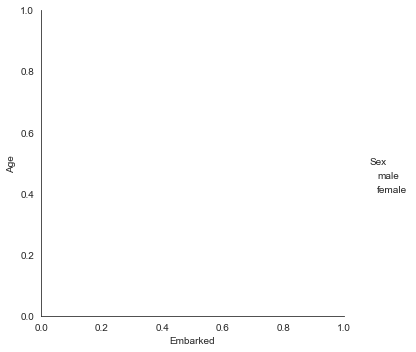

In [69]:
f, ax = plt.subplots(2, 3,figsize=(16,8))
sns.catplot(x="Sex", y="Age", kind="swarm", hue='Survived',  data=train, ax=ax[0,0])
sns.catplot(x="Pclass", y="Age", kind="swarm", hue='Survived',  data=train, ax=ax[0,1])
sns.catplot(x="Embarked", y="Age", kind="swarm", hue='Survived',  data=train, ax=ax[0,2])
sns.catplot(x="Pclass", y="Age", kind="swarm", hue='Sex', 
            data=train,palette={"male": "g", "female": "m"}, ax=ax[1,1])
sns.catplot(x="Embarked", y="Age", kind="swarm", hue='Sex', 
            data=train, palette={"male": "g", "female": "m"}, ax=ax[1,2])


We can see it is better to be female, regardless of age, although the effects are diminished for those passengers under 10. It is also demonstrably better to be in the first class. However, some of this is due to the gender ratio in first class (see the green and purple charts). This also hold true for the Embarkation port 'C'

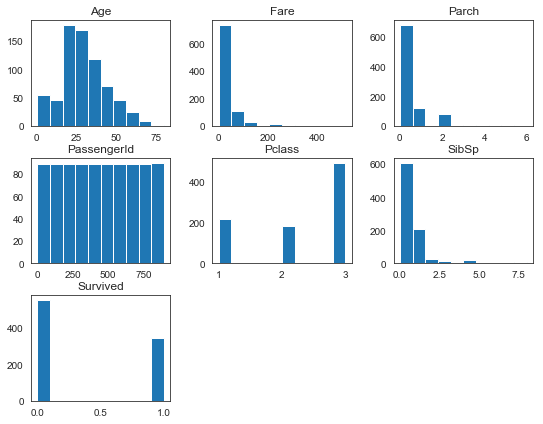

In [84]:
train.hist(bins=10,figsize=(9,7),grid=False);

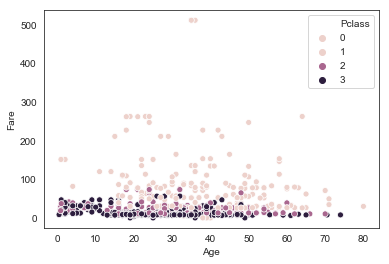

In [82]:
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=train)
